# Coding Examples

Think of the lensing problem as comprising a few distinct steps:

### 1. Define coordinates that we can work with
The following gives us two grids, describing the pair of coordinates in each pixel

In [93]:
import numpy as np

# List of single coordinates
x = np.linspace(-2.0, 2.0, 400)

# 2 arrays of coordinates (one each for x and y)
x1, x2 = np.meshgrid(x, x)

print x1

[[-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]
 [-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]
 [-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]
 ..., 
 [-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]
 [-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]
 [-2.         -1.98997494 -1.97994987 ...,  1.97994987  1.98997494  2.        ]]


We move around the grid by the pair of indices, e.g the x and y coordinates in pixel (34, 89) is

In [94]:
print x1[34, 89], x2[34, 89]

-1.10776942356 -1.65914786967


These grids are _numpy arrays_ so we can do operations on them and use them in functions as if they were just numbers. For any special functions e.g. trig functions/exponential etc be sure to use the `numpy` version:

In [95]:
y1 = np.cos(x1 * 3.14159)

In [96]:
print y1

[[ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]
 [ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]
 [ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]
 ..., 
 [ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]
 [ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]
 [ 1.          0.99950392  0.9980165  ...,  0.9980165   0.99950392  1.        ]]


___
### 2. Define a source
We'll use a Sersic profile (see https://en.wikipedia.org/wiki/Sersic_profile)...

In [97]:
def source(pixels, (s1, s2), b0, re, n=2.0):
    """
    Returns a sersic profile centred on (s1, s2) with
    a radius of re and a brightness of b0
    """
    
    # Find radial distance from source centre for all pixels
    r = np.hypot(pixels[0] - s1, pixels[1] - s2)
    
    # Use this distance in the Sersic profile
    return b0 * np.exp(- (r / re) ** (1.0 / n))

`source` returns an array of brightness values, every pixel in the array has actual coordinates given by `(x1, x2)`

In [98]:
sx, sy, b0, re = 0.1, -0.2, 1.0, 0.1
src = source((x1, x2), (sx, sy), b0, re)

In [99]:
print src

[[ 0.00519974  0.00523749  0.00527549 ...,  0.00608641  0.00604334
   0.00600053]
 [ 0.00523205  0.00527018  0.00530855 ...,  0.00612787  0.00608434
   0.00604107]
 [ 0.00526451  0.005303    0.00534176 ...,  0.00616955  0.00612555
   0.00608181]
 ..., 
 [ 0.00407968  0.00410554  0.00413152 ...,  0.00467621  0.00464774
   0.00461939]
 [ 0.00405299  0.00407858  0.0041043  ...,  0.00464323  0.00461507
   0.00458703]
 [ 0.00402644  0.00405177  0.00407723 ...,  0.00461047  0.00458261
   0.00455488]]


And we can plot with `matplotlib`:

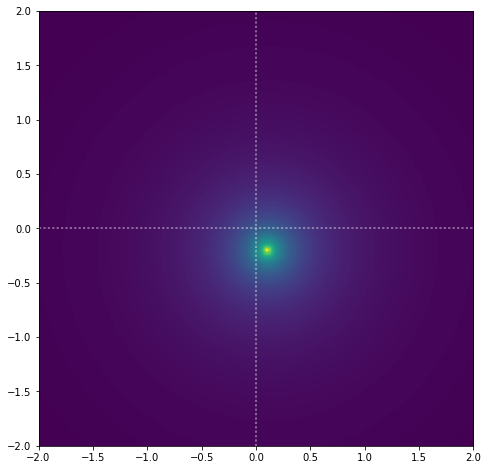

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(src, interpolation='none', extent=[-2, 2, -2, 2], origin='lower')
ax.axhline(0.0, linestyle='dotted', color='w', alpha=0.5)
ax.axvline(0.0, linestyle='dotted', color='w', alpha=0.5)
fig.set_size_inches(8, 8)
plt.show()

##### Few notes on `imshow` seeing as you'll be using it a lot:
* Its only _required_ argument is the actual grid of pixel values
* It's useful to also tell it the actual physical space these pixels occupy, then it will draw the proper coordinates on the axes, that's what `extent=[-2, 2, -2, 2]` is for. Otherwise it will just use the pixel indices for the coordinates (in this case each axis would read 0 to 100)
* By default the origin in `imshow` is in the top left corner, no idea why, to change that just use `origin='lower'`, this puts it in the bottom left corner
* By default it will also _interpolate_ between the values in the pixel when it draws the image. This is purely cosmetic and makes the image look smoother. I prefer to turn it off with `interpolation='none'`, this way every pixel in the plot represents exactly the value calculated in that pixel, and not a smoothed interpolation of it.

___
### 3. Calculate the deflection angle and create the image

In [81]:
def deflection_angle(pixels, er):
    """
    Calculates the deflection angle for a point mass with
    Einstein radius of er
    """
    # Convert to polar coordinates
    r = np.hypot(pixels[0], pixels[1])
    phi = np.arctan2(pixels[1], pixels[0])
    
    return (np.cos(phi) * (er ** 2 / r),
            np.sin(phi) * (er ** 2 / r))

In [82]:
# Get the deflection angle
a1, a2 = deflection_angle((x1, x2), 1.0)

In [88]:
# Now we do the coordinate transformation
img = source((x1 - a1, x2 - a2), (sx, sy), b0, re)

In [91]:
# We can even add noise to make it look more like a real observation
img = img + np.random.normal(0.0, 0.01, size=(100, 100))

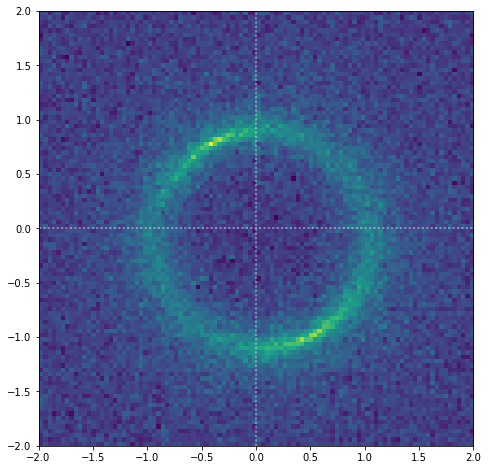

In [103]:
fig, ax = plt.subplots()
ax.imshow(img, interpolation='none', extent=[-2, 2, -2, 2], origin='lower')
ax.axhline(0.0, linestyle='dotted', color='w', alpha=0.5)
ax.axvline(0.0, linestyle='dotted', color='w', alpha=0.5)
fig.set_size_inches(8, 8)
plt.show()